In [1]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy

from sklearn import metrics

In [182]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [183]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

In [184]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [185]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [275]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [259]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 128)               100480    
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [276]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [277]:
filepath = 'eachModel5/CheckPoint-{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1,
    save_best_only=False,save_weights_only=False, mode='auto', save_freq='epoch')

In [278]:
history = model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10,callbacks=[checkpoint])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.4871 - accuracy: 0.8252
Epoch 1: saving model to eachModel5\CheckPoint-01.hdf5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4870 - accuracy: 0.8252 - val_loss: 0.5459 - val_accuracy: 0.7901
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8683
Epoch 2: saving model to eachModel5\CheckPoint-02.hdf5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3611 - accuracy: 0.8682 - val_loss: 0.3709 - val_accuracy: 0.8669
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8787
Epoch 3: saving model to eachModel5\CheckPoint-03.hdf5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3286 - accuracy: 0.8787 - val_loss: 0.3691 - val_accuracy: 0.8637
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.8874
Epoch 4: saving model to eachModel5\CheckPoi

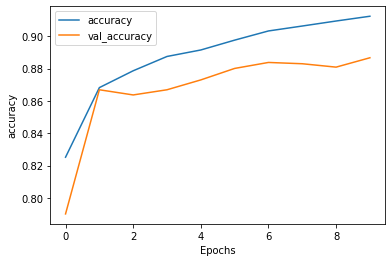

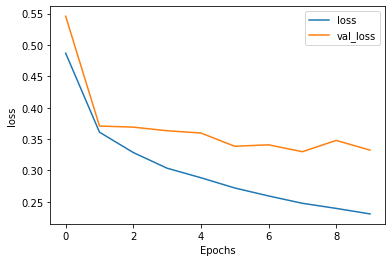

In [279]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

FARKLI BAŞLANGIÇ NOKTALARI İÇİN PCA ÇİZİMİ

In [280]:
allPointWeightX1 = []
allPointWeightY1 = []

In [281]:
for j in range(5):
    for i in range(10):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:5]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:5]))
    
    for i in range(10):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[5]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[5]))

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\2549362355.py:10: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\2549362355.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [282]:
allPointWeightX1 = np.array(allPointWeightX1)
allPointWeightY1 = np.array(allPointWeightY1)

In [283]:
for i in range(50):
    allPointWeightX1[i][0] = allPointWeightX1[i][0].flatten()
    allPointWeightX1[i][1] = allPointWeightX1[i][1].flatten()
    allPointWeightX1[i][2] = allPointWeightX1[i][2].flatten()
    allPointWeightX1[i][3] = allPointWeightX1[i][3].flatten()
    allPointWeightX1[i][4] = allPointWeightX1[i][4].flatten()

In [284]:
Xlist= []
for i in range(50):
    Xlist.append(np.hstack((allPointWeightX1[i][0],allPointWeightX1[i][1],allPointWeightX1[i][2],allPointWeightX1[i][3],allPointWeightX1[i][4])))

In [285]:
Xlist = np.array(Xlist)

In [286]:
df = px.data.iris()
X = Xlist

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [287]:
X = Xlist

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

MODEL GRADİENT HESABI İLE OPTİMUM YOLUN BULUNMASI

1. İLE 2. NOKTA ARASINDA

In [344]:
w0 = load_model('eachModel1/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel2/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari12 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(5):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            listem2 = []
            for i in range(60000):
                listem2.append(1)
                for j in range(9):
                    listem2.append(0)

            listem2 = np.array(listem2)
            listem2 = np.reshape(listem2,(60000,10))
            listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(listem2)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i]))/5)
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1]))/5)

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.00001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8826
Interpolated weights 1:
313/313 [==============================] - 1s 3ms/step - loss: 0.5167 - accuracy: 0.8264
Interpolated weights 2:
313/313 [==============================] - 1s 3ms/step - loss: 1.1456 - accuracy: 0.6202
Interpolated weights 3:
313/313 [==============================] - 1s 3ms/step - loss: 1.0429 - accuracy: 0.6528
Interpolated weights 4:
313/313 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8475
Interpolated weights 5:
313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8780
Interpolated weights 6:
313/313 [==============================] - 1s 2ms/step - loss: 1.1456 - accuracy: 0.6202
0.34806129336357117 1.1456211805343628
 19/313 [>.............................] - ETA: 0s - loss: 0.5130 - accuracy: 0.8355

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\3407108282.py:85: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 3ms/step - loss: 1.0429 - accuracy: 0.6528
0.5166670680046082 1.042905330657959
313/313 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8475
1.1456211805343628 0.4579296410083771
 40/313 [==>...........................] - ETA: 0s - loss: 1.0691 - accuracy: 0.6422

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\3407108282.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8780
1.042905330657959 0.35360366106033325
313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8780
0.4579296410083771 0.35360366106033325


C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\3407108282.py:93: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\3407108282.py:112: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_7704\3407108282.py:142: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

313/313 [==============================] - 1s 2ms/step - loss: 8.1715 - accuracy: 0.1000
0.34806129336357117 8.171475410461426
313/313 [==============================] - 1s 3ms/step - loss: 8.5636 - accuracy: 0.1000
16.69786262512207 8.563552856445312
313/313 [==============================] - 1s 3ms/step - loss: 20.3158 - accuracy: 0.1000
8.171475410461426 20.31580352783203
313/313 [==============================] - 1s 3ms/step - loss: 16.8827 - accuracy: 0.1213
8.563552856445312 16.882719039916992
313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8780
20.31580352783203 0.35360366106033325
313/313 [==============================] - 1s 3ms/step - loss: 8.6245 - accuracy: 0.1000
0.34806129336357117 8.62454891204834
313/313 [==============================] - 1s 3ms/step - loss: 8.9890 - accuracy: 0.1000
16.730775833129883 8.988987922668457
313/313 [==============================] - 1s 3ms/step - loss: 20.3387 - accuracy: 0.1000
8.62454891204834 20.338653

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


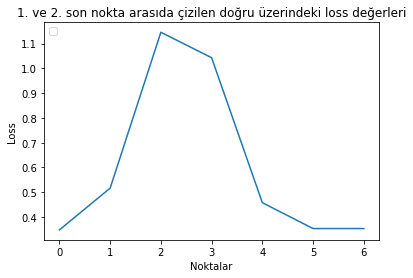

In [340]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('1. ve 2. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


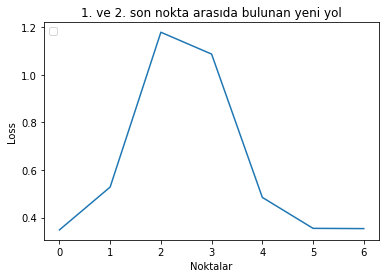

In [341]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('1. ve 2. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [319]:
def step(X, y,i):
    # keep track of our gradients
    with tf.GradientTape() as tape:
        # make a prediction using the model and then calculate the
        # loss
        model.set_weights(tümNoktalarim[i])
        pred = model(X)
        listem = []
        for i in range(60000):
            for j in range(10):
                listem.append(y[i])

        listem = np.array(listem)
        listem = listem/9
        # listem = np.reshape(listem,(60000,10))
        # tensor1 = tf.convert_to_tensor(listem)

        print("y : \n",y.shape)
        print("pred : \n",pred.shape)
        tensor1 = tf.convert_to_tensor(listem)
        print("tensor1 : \n",tensor1.shape)
        tensor2 = tf.reshape(tensor1,[60000,10])
        print("tensor2 : \n",tensor2.shape)
        loss = categorical_crossentropy(tensor2, pred)
    # calculate the gradients using our tape and then update the
    # model weights
    grads = tape.gradient(loss, model.trainable_variables)
    return grads

In [320]:
grads = step(train_images,train_labels,0)

y : 
 (60000,)
pred : 
 (60000, 10)
tensor1 : 
 (600000,)
tensor2 : 
 (60000, 10)


In [321]:
len(grads)

6

In [247]:
w0 = load_model('eachModel1/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)


1875/1875 - 6s - loss: 0.2225 - accuracy: 0.9155 - val_loss: 0.3415 - val_accuracy: 0.8818 - 6s/epoch - 3ms/step


In [249]:
firstWeight = np.array(firstWeight)
firstWeight[5].shape


IndexError: index 6 is out of bounds for axis 0 with size 6

In [311]:
pred = model(train_images)
pred

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [324]:
listem2 = []
for i in range(60000):
    listem2.append(train_labels[i])
    for j in range(9):
        listem2.append(0)

listem2 = np.array(listem2)
listem2 = np.reshape(listem2,(60000,10))

In [333]:
listem2 = np.array(listem2)
listem2 = np.reshape(listem2,(60000,10))
listem2[0:10]

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [289]:
list1 = [1,2,3]

In [292]:
list1 = np.array(list1)
list1 =list1*(0.1)

In [293]:
list1

array([0.1, 0.2, 0.3])

In [187]:
listem = []
for i in range(60000):
    for i in range(10):
        listem.append(train_labels[i])

In [188]:
listem = np.array(listem)

In [190]:
listem = np.reshape(listem,(60000,10))

In [194]:
listem[0]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [173]:
pred = model(train_images)

In [175]:
pred[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.3318082e-08, 7.0463263e-10, 5.6409821e-10, 7.9140605e-10,
       4.0974524e-10, 8.2928928e-08, 3.7666470e-09, 7.2169122e-03,
       2.5147264e-07, 9.9278271e-01], dtype=float32)>